In [1]:
import numpy as np
import pandas as pd

In [2]:
daily_df = pd.read_parquet(r"D:\stock_prop_shop\.all\data\price_data\daily\daily_data.parquet")

In [3]:
daily_df = daily_df.drop_duplicates(subset=['date', 'order_book_id'])

In [4]:
close_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="close")
open_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="open")

In [5]:
daily_df["money_per_trd"] = daily_df["total_turnover"] / daily_df["num_trades"]
daily_df["ret_pct"] = daily_df.groupby("order_book_id")["close"].pct_change()

In [6]:
inday_mom = -(close_df / open_df -1).rolling(20).sum().shift(1)

In [7]:
inday_mom.to_parquet("./inday_mom.parquet")

In [8]:
import performance as perf
import utils 
import tears
import plotting

In [9]:
ftr_stack = utils.get_clean_factor_and_forward_returns(inday_mom, close_df, quantiles=10, periods=(5,10,20))

Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Information Analysis


,5D,10D,20D
IC Mean,0.053,0.065,0.085
IC Std.,0.132,0.128,0.129
IC_IR,0.403,0.511,0.654
t-stat(IC),14.276,18.098,23.155
p-value(IC),0.000,0.000,0.000
IC Skew,0.409,0.397,0.412
IC Kurtosis,2.287,1.213,1.097


c:\Users\41979\Desktop\assignment\utils.py:923: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,5D,10D,20D
Quantile 1 Mean Turnover,0.392,0.569,0.817
Quantile 2 Mean Turnover,0.697,0.800,0.888
Quantile 3 Mean Turnover,0.772,0.844,0.899
Quantile 4 Mean Turnover,0.801,0.858,0.897
Quantile 5 Mean Turnover,0.814,0.863,0.891
Quantile 6 Mean Turnover,0.815,0.862,0.885
Quantile 7 Mean Turnover,0.809,0.858,0.886
Quantile 8 Mean Turnover,0.789,0.848,0.893
Quantile 9 Mean Turnover,0.737,0.822,0.900
Quantile 10 Mean Turnover,0.492,0.674,0.886


,5D,10D,20D
Mean Factor Rank Autocorrelation,0.726,0.483,0.024


<Figure size 640x480 with 0 Axes>

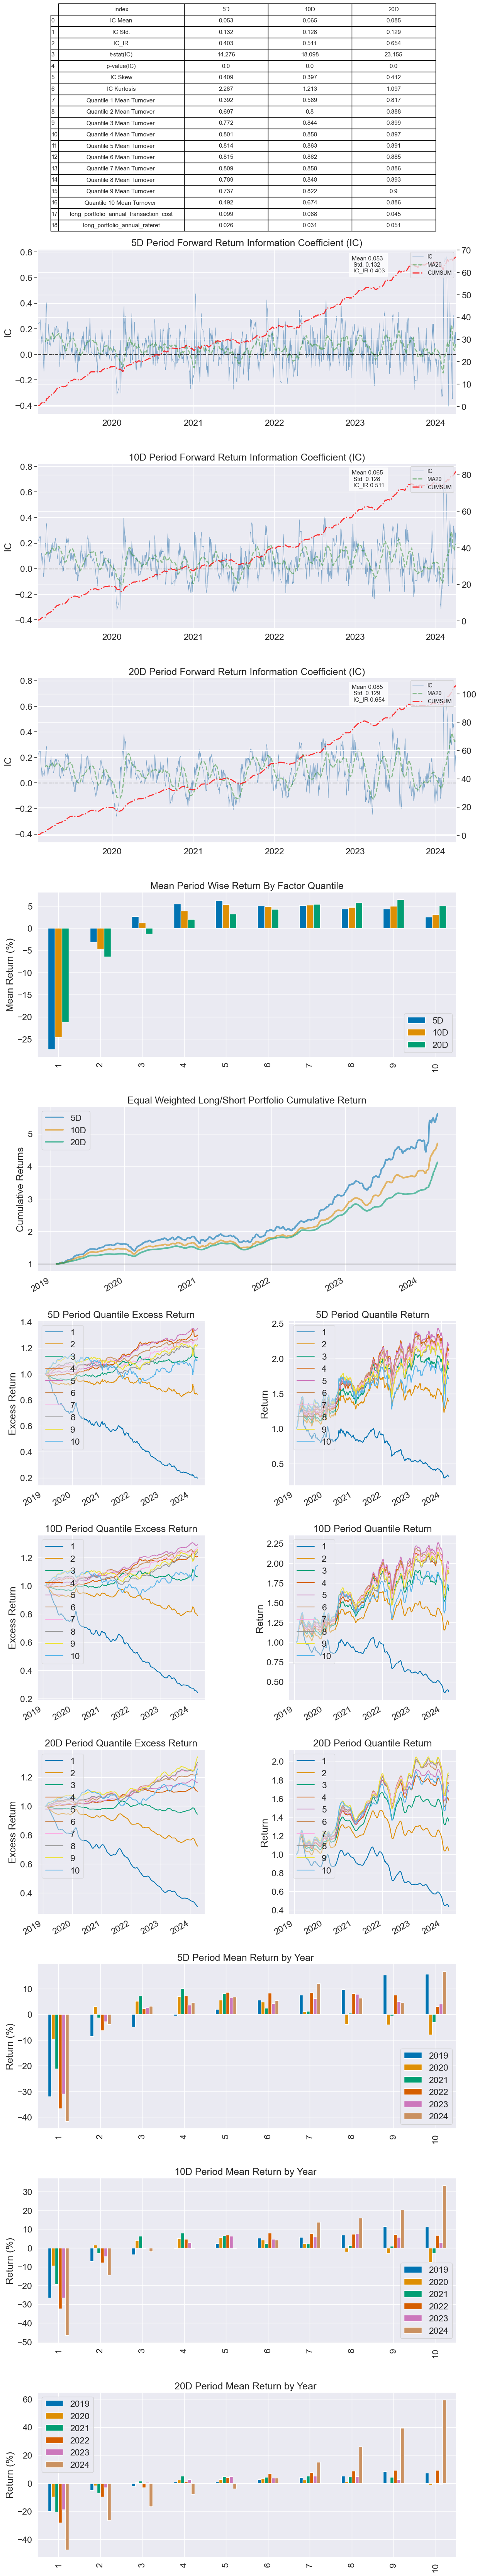

In [10]:
tears.create_summary_tear_sheet(ftr_stack, file_path ="./inday_mom/")